<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Covid_Forcecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
  import pandas as pd
  from keras.layers import Dense, LSTM
  import matplotlib.pyplot as plt
  import tensorflow as tf
  from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_Submisions/Covid/data_covid_indo.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.007,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
1,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
3,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
4,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,0.015,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN


In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.007,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
1,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
2,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
3,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
4,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,0.015,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,IDN,Asia,Indonesia,2021-08-10,3718821.0,32081.0,31731.571,110619.0,2048.0,1675.714,13595.978,117.288,116.010,404.422,7.487,6.126,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146150.0,19177891.0,70.114,0.534,134871.0,0.493,0.235,4.3,people tested,76933946.0,51759158.0,25174788.0,NaN,1271328.0,1055833.0,28.13,18.92,9.20,NaN,3860.0,NaN,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
527,IDN,Asia,Indonesia,2021-08-11,3749446.0,30625.0,30982.714,112198.0,1579.0,1651.714,13707.942,111.965,113.273,410.195,5.773,6.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135459.0,19313350.0,70.609,0.495,132582.0,0.485,0.234,4.3,people tested,78162340.0,52373483.0,25788857.0,NaN,1228394.0,1098707.0,28.58,19.15,9.43,NaN,4017.0,NaN,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN
528,IDN,Asia,Indonesia,2021-08-12,3774155.0,24709.0,29403.429,113664.0,1466.0,1612.714,13798.278,90.336,107.499,415.555,5.360,5

In [ ]:
data = [df["location"],df["date"],df["total_cases"],df["new_cases"],df["total_deaths"]]
headers = ["location","date","total_cases","new_cases","total_deaths"]
df2 = pd.concat(data, axis=1, keys=headers)

In [ ]:
df2

,location,date,total_cases,new_cases,total_deaths
0,Indonesia,2020-03-02,2.0,2.0,NaN
1,Indonesia,2020-03-03,2.0,0.0,NaN
2,Indonesia,2020-03-04,2.0,0.0,NaN
3,Indonesia,2020-03-05,2.0,0.0,NaN
4,Indonesia,2020-03-06,4.0,2.0,NaN
...,...,...,...,...,...
526,Indonesia,2021-08-10,3718821.0,32081.0,110619.0
527,Indonesia,2021-08-11,3749446.0,30625.0,112198.0
528,Indonesia,2021-08-12,3774155.0,24709.0,113664.0
529,Indonesia,2021-08-13,3804943.0,30788.0,115096.0


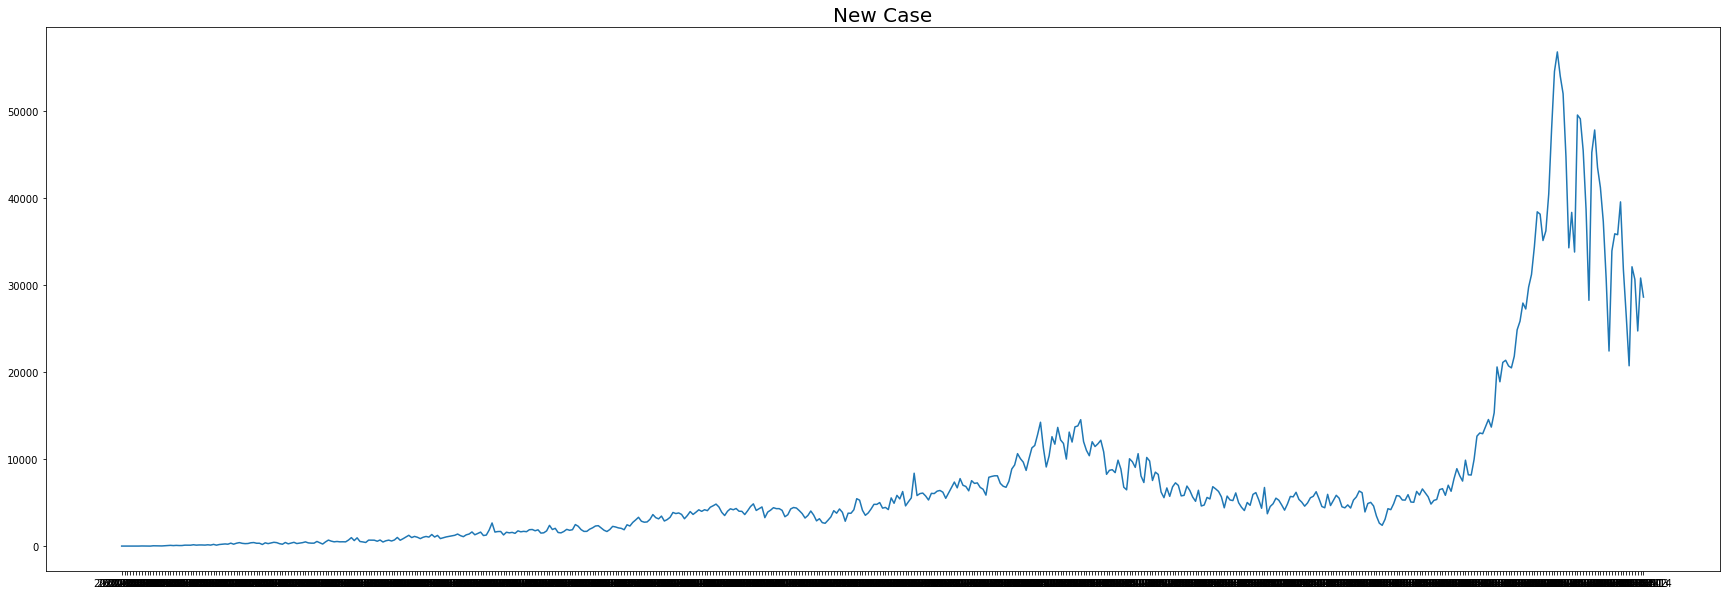

In [ ]:
dates = df['date'].values
case  = df['new_cases'].values
  
  
plt.figure(figsize=(30,10))
plt.plot(dates, case)
plt.title('New Case',
          fontsize=20);

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      531 non-null    object 
 1   date          531 non-null    object 
 2   total_cases   531 non-null    float64
 3   new_cases     531 non-null    float64
 4   total_deaths  522 non-null    float64
dtypes: float64(3), object(2)
memory usage: 20.9+ KB


In [ ]:
df2["total_deaths"] = df2["total_deaths"].fillna(0.0)

In [ ]:
df2.isnull().sum()

location        0
date            0
total_cases     0
new_cases       0
total_deaths    0
dtype: int64

In [ ]:
data_model = [df2["date"],df2["new_cases"]]
df_model = pd.concat(data_model, axis=1)
df_model

,date,new_cases
0,2020-03-02,2.0
1,2020-03-03,0.0
2,2020-03-04,0.0
3,2020-03-05,0.0
4,2020-03-06,2.0
...,...,...
526,2021-08-10,32081.0
527,2021-08-11,30625.0
528,2021-08-12,24709.0
529,2021-08-13,30788.0


In [ ]:
df_model['date'] = pd.to_datetime(df_model['date'])
df_model.set_index('date', inplace= True)
df_model =df_model.resample('D').mean()


In [ ]:
df_model

,new_cases
date,
2020-03-02,2.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,2.0
...,...
2021-08-10,32081.0
2021-08-11,30625.0
2021-08-12,24709.0


In [ ]:
df_model=df_model.values
df_model = df_model.astype('float32')
df_model

array([[2.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [2.0000e+00],
       [0.0000e+00],
       [2.0000e+00],
       [1.3000e+01],
       [8.0000e+00],
       [7.0000e+00],
       [0.0000e+00],
       [3.5000e+01],
       [2.7000e+01],
       [2.1000e+01],
       [1.7000e+01],
       [3.8000e+01],
       [5.5000e+01],
       [8.4000e+01],
       [5.8000e+01],
       [8.1000e+01],
       [6.4000e+01],
       [6.5000e+01],
       [1.0700e+02],
       [1.0400e+02],
       [1.0300e+02],
       [1.5300e+02],
       [1.0900e+02],
       [1.3000e+02],
       [1.2900e+02],
       [1.1400e+02],
       [1.4900e+02],
       [1.1300e+02],
       [1.9600e+02],
       [1.0600e+02],
       [1.8100e+02],
       [2.1800e+02],
       [2.4700e+02],
       [2.1800e+02],
       [3.3700e+02],
       [2.1900e+02],
       [3.3000e+02],
       [3.9900e+02],
       [3.1600e+02],
       [2.8200e+02],
       [2.9700e+02],
       [3.8000e+02],
       [4.0700e+02],
       [3.250

In [ ]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(df_model)

In [ ]:
sc

array([[-0.99992955],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-0.99992955],
       [-1.        ],
       [-0.99992955],
       [-0.9995419 ],
       [-0.99971807],
       [-0.99975336],
       [-1.        ],
       [-0.99876666],
       [-0.9990486 ],
       [-0.99926   ],
       [-0.999401  ],
       [-0.998661  ],
       [-0.9980619 ],
       [-0.99704003],
       [-0.9979562 ],
       [-0.9971457 ],
       [-0.9977448 ],
       [-0.9977095 ],
       [-0.9962295 ],
       [-0.99633527],
       [-0.9963705 ],
       [-0.9946086 ],
       [-0.9961591 ],
       [-0.9954191 ],
       [-0.9954543 ],
       [-0.9959829 ],
       [-0.99474955],
       [-0.9960181 ],
       [-0.9930934 ],
       [-0.99626476],
       [-0.99362195],
       [-0.99231815],
       [-0.99129623],
       [-0.99231815],
       [-0.9881248 ],
       [-0.99228287],
       [-0.9883715 ],
       [-0.98594004],
       [-0.98886484],
       [-0.9900629 ],
       [-0.9895343 ],
       [-0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 450
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)

(450, 30, 1)
(51, 30, 1)


In [ ]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
15/15 [==============================] - 28s 36ms/step - loss: 0.1390
Epoch 2/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0258
Epoch 3/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0153
Epoch 4/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0134
Epoch 5/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0130
Epoch 6/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0129
Epoch 7/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0130
Epoch 8/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0121
Epoch 9/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0097
Epoch 10/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0047
Epoch 11/50
15/15 [==============================] - 1s 36ms/step - loss: 0.0035
Epoch 12/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0042
Epoch 13/50
15/15 [=================

Text(0.5, 1.0, 'Model Accuracy')

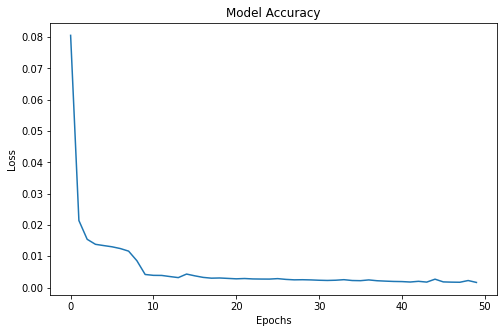

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [ ]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

398858980.0

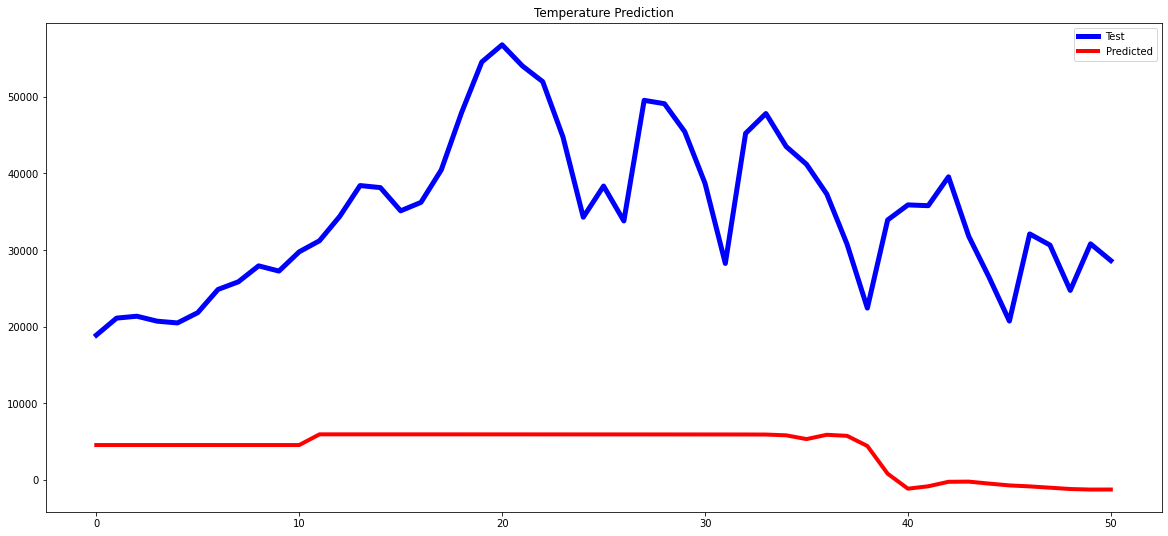

In [ ]:


plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Temperature Prediction")
plt.show()



In [ ]:


test = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])



In [ ]:
results = pd.concat([test,pred],axis=1)
results

,Actual,Predict
0,18872.000000,4533.752441
1,21095.000000,4533.717285
2,21342.000000,4533.847168
3,20694.000000,4533.933594
4,20467.000000,4534.075684
5,21807.000000,4534.116211
6,24836.000000,4534.040039
7,25830.000000,4533.805176
8,27913.000000,4533.573242
9,27233.000000,4533.316406
